In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
encoder_input=Input(shape=(784,))
encoded=Dense(64,activation='relu')(encoder_input)
encoder=Model(encoder_input,encoded)

In [ ]:
decoder_input=Input(shape=(64,))
decoded=Dense(784,activation='sigmoid')(decoder_input)
decoder=Model(decoder_input,decoded)

In [ ]:
autoencoder=Model(encoder_input,decoder(encoder(encoder_input)))
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history=autoencoder.fit(x_train,x_train,epochs=25,batch_size=512,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1231 - val_loss: 0.0464
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0420 - val_loss: 0.0318
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0302 - val_loss: 0.0247
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0238 - val_loss: 0.0201
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - val_loss: 0.0168
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0165 - val_loss: 0.0144
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0142 - val_loss: 0.0124
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 9/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 10/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 11/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 12/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 

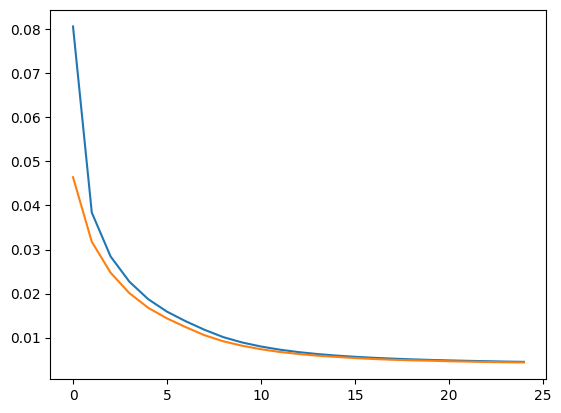

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 784)


In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [ ]:
x=autoencoder.predict(x_train)
history=model.fit(x,y_train,epochs=10,validation_split=0.2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2009 - val_loss: 0.1294
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1144 - val_loss: 0.1065
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0788 - val_loss: 0.1155
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0671 - val_loss: 0.0888
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0490 - val_loss: 0.0980
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0435 - val_loss: 0.1056
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0380 - val_loss: 0.0886
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0327 - val_loss: 0.0898
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0264 - val_loss: 0.0995
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0198 - val_loss: 0.0908


In [ ]:
X_test=autoencoder.predict(x_test)
output=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(output.shape)

(10000, 10)


In [ ]:
y_output=np.argmax(output,axis=1)

In [ ]:
print(y_output)

[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_output,y_test))

0.9765
